In [1]:
import numpy as np 
import pandas as pd
import cv2
data=[]
categories=['NORMAL','PNEUMONIA']
import os
for category in categories:
    path=os.path.join('chest_xray/train', category)
    label=categories.index(category)
    for file in os.listdir(path):
        img_path=os.path.join(path,file)
        img=cv2.imread(img_path)
        img=cv2.resize(img,(224,224))
        data.append([img,label])

In [2]:
len(data)

3216

In [3]:
import random
random.shuffle(data)

In [4]:
x=[]
y=[]
for features,label in data:
    x.append(features)
    y.append(label)

In [5]:
x=np.array(x)
y=np.array(y)


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train.shape

(2251, 224, 224, 3)

In [7]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg=VGG16()
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.models import Sequential
model=Sequential()
for layer in vgg.layers[:-1]:
    model.add(layer)
for layer in model.layers:
    layer.trainable=False

In [9]:
from keras.layers import Dense
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 432s 6s/step - accuracy: 0.7778 - loss: 0.5660 - val_accuracy: 0.9409 - val_loss: 0.1348
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 474s 7s/step - accuracy: 0.9439 - loss: 0.1404 - val_accuracy: 0.9544 - val_loss: 0.1105
Epoch 3/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 449s 6s/step - accuracy: 0.9617 - loss: 0.1137 - val_accuracy: 0.9492 - val_loss: 0.1182
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 444s 6s/step - accuracy: 0.9597 - loss: 0.0928 - val_accuracy: 0.9575 - val_loss: 0.0941
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 440s 6s/step - accuracy: 0.9766 - loss: 0.0699 - val_accuracy: 0.9617 - val_loss: 0.0939


In [15]:
model.save("pneumonia_detection.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step


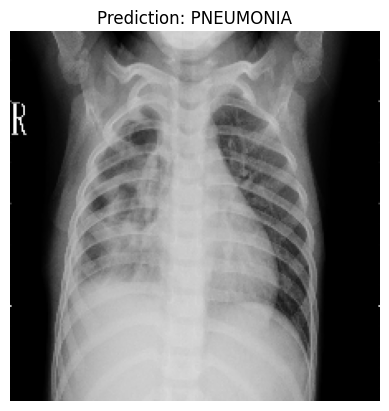

In [20]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
model = load_model("pneumonia_detection.h5")
img_path = 'person1954_bacteria_4886.jpeg'  # your image path
img=cv2.imread(img_path)
img=cv2.resize(img,(224,224))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.expand_dims(img, axis=0)
y_pred=model.predict(img)
if(y_pred[0]<=0.5):
    label="NORMAL"
else:
    label="PNEUMONIA"
plt.imshow(img_rgb)
plt.title(f"Prediction: {label}")
plt.axis('off')
plt.show()